# Automap training and evaluation
1. evaluate the performance of the reconstruction
2. check the details of automap

update:
1. Add training procedure to notebook(so that multiple trainings is feasible)  

In [2]:
import tensorflow.keras as keras
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib
import h5py, mnist

# automap related implementations
from automap import create_automap, train_automap
from data_provider import sinogram_generator, get_verification_ds, keras_sinogram_generator

ModuleNotFoundError: No module named 'tensorflow'

## Create mnist dataset

In [ ]:
# Load data using mnist-parser from pip
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.parse_data('.\\data')

# dataset split
x_train = preprocess_ds(x_train)
ds_train, ds_test = mnist_ds_split(x_train, y_train, 2)
ds_veri = ds_train[-200:]
ds_train = ds_train[:-200]

# dump using h5py
f = h5py.File('.\\data\\mnist_ds_split_2.hdf5', 'w')
f.create_dataset("train", data=ds_train)
f.create_dataset("test",  data=ds_test)
f.create_dataset('veri', data=ds_veri)
f.close()

In [1]:
# load data from hdf5
import h5py
ds_h5f = h5py.File('.\\data\\mnist_ds_split_2.hdf5', 'r')
train_ds = ds_h5f['train']

test_ds = ds_h5f["test"]
veri_ds = ds_h5f['veri']
print(train_ds.shape)
print(test_ds.shape)
print(veri_ds.shape)

(53842, 56, 56)
(5958, 56, 56)
(200, 56, 56)


## AUTOMAP Training

In [4]:
# Train with full sinogram
bs = 20    # batch size
sino_interval = 1

sinoGen = keras_sinogram_generator(ds=train_ds, bs=bs,
                             interval=sino_interval)
x_veri, y_veri = get_verification_ds(veri_ds, sino_interval)

model = create_automap(input_shape=(64, int(180/sino_interval), 1),
                       output_shape=(64, 64, 1),
                       trans_n=0,
                       nfilters=64,
                       FC_activation='tanh')
model.summary()
optimizer = keras.optimizers.RMSprop(learning_rate=0.00002)
model_name_1 = train_automap(model=model, ds_gen=sinoGen,
              optimizer = optimizer,
              steps_per_epoch=340, epochs=50,
              validation_data=(x_veri, y_veri))
print(model_name_1)

D:\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:63: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 180, 1)]      0         
_________________________________________________________________
flatten (Flatten)            (None, 11520)             0         
_________________________________________________________________
dense (Dense)                (None, 8192)              94380032  
_________________________________________________________________
batch_normalization (BatchNo (None, 8192)              32768     
_________________________________________________________________
activation (Activation)      (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              33558528  
_________________________________________________________________
batch_normalization_1 (Batch (None, 4096)              16384 

D:\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:63: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


340/340 [==============================] - 378s 1s/step - loss: 0.0665 - accuracy: 0.0088 - val_loss: 0.0542 - val_accuracy: 0.0000e+00
Epoch 2/50
340/340 [==============================] - 356s 1s/step - loss: 0.0543 - accuracy: 0.0089 - val_loss: 0.0541 - val_accuracy: 0.0000e+00
Epoch 3/50
340/340 [==============================] - 353s 1s/step - loss: 0.0488 - accuracy: 0.0089 - val_loss: 0.0539 - val_accuracy: 0.0000e+00
Epoch 4/50
340/340 [==============================] - 362s 1s/step - loss: 0.0441 - accuracy: 0.0089 - val_loss: 0.0488 - val_accuracy: 0.0000e+00
Epoch 5/50
340/340 [==============================] - 362s 1s/step - loss: 0.0403 - accuracy: 0.0089 - val_loss: 0.0382 - val_accuracy: 0.0000e+00
Epoch 6/50
340/340 [==============================] - 360s 1s/step - loss: 0.0367 - accuracy: 0.0089 - val_loss: 0.0413 - val_accuracy: 0.0000e+00
Epoch 7/50
340/340 [==============================] - 360s 1s/step - loss: 0.0340 - accuracy: 0.0089 - val_loss: 0.0390 - val_acc

In [5]:
# Train with 4 projections
bs = 20   # batch size
sino_interval = 45
sinoGen = keras_sinogram_generator(ds=train_ds, bs=bs,
                             interval=sino_interval)

# get verification x, y
x_veri, y_veri = get_verification_ds(veri_ds, sino_interval)

model = create_automap(input_shape=(64, int(180/sino_interval), 1),
                       output_shape=(64, 64, 1),
                       trans_n=0,
                       nfilters=64,
                       FC_activation='tanh')
model.summary()
optimizer = keras.optimizers.RMSprop(learning_rate=0.00002)
model_name_45 = train_automap(model=model, ds_gen=sinoGen,
                              optimizer=optimizer,
                             steps_per_epoch=340, epochs=50,
                             validation_data=(x_veri, y_veri))
print(model_name_45)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 4, 1)]        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 8192)              2105344   
_________________________________________________________________
batch_normalization_3 (Batch (None, 8192)              32768     
_________________________________________________________________
activation_4 (Activation)    (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              33558528  
_________________________________________________________________
batch_normalization_4 (Batch (None, 4096)              1638

D:\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:63: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


340/340 [==============================] - 18s 53ms/step - loss: 0.0696 - accuracy: 0.0088 - val_loss: 0.0508 - val_accuracy: 0.0000e+00
Epoch 2/50
340/340 [==============================] - 14s 42ms/step - loss: 0.0543 - accuracy: 0.0089 - val_loss: 0.0619 - val_accuracy: 1.2207e-06
Epoch 3/50
340/340 [==============================] - 15s 43ms/step - loss: 0.0487 - accuracy: 0.0089 - val_loss: 0.0577 - val_accuracy: 0.0000e+00
Epoch 4/50
340/340 [==============================] - 14s 42ms/step - loss: 0.0437 - accuracy: 0.0089 - val_loss: 0.0560 - val_accuracy: 0.0000e+00
Epoch 5/50
340/340 [==============================] - 15s 43ms/step - loss: 0.0395 - accuracy: 0.0089 - val_loss: 0.0564 - val_accuracy: 1.2207e-06
Epoch 6/50
340/340 [==============================] - 15s 43ms/step - loss: 0.0360 - accuracy: 0.0089 - val_loss: 0.0476 - val_accuracy: 0.0000e+00
Epoch 7/50
340/340 [==============================] - 15s 43ms/step - loss: 0.0331 - accuracy: 0.0090 - val_loss: 0.0579 - 

In [6]:
# Train with 2 projections
bs = 20    # batch size
sino_interval = 90
sinoGen = keras_sinogram_generator(ds=train_ds, bs=bs,
                             interval=sino_interval)

# get verification x, y
x_veri, y_veri = get_verification_ds(veri_ds, sino_interval)

model = create_automap(input_shape=(64, int(180/sino_interval), 1),
                       output_shape=(64, 64, 1),
                       trans_n=0,
                       nfilters=64,
                       FC_activation='tanh')
model.summary()
optimizer = keras.optimizers.RMSprop(learning_rate=0.00002)
model_name_90 = train_automap(model=model, ds_gen=sinoGen,
                              optimizer=optimizer,
                             steps_per_epoch=340, epochs=50,
                             validation_data=(x_veri, y_veri))
print(model_name_90)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 2, 1)]        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 8192)              1056768   
_________________________________________________________________
batch_normalization_6 (Batch (None, 8192)              32768     
_________________________________________________________________
activation_8 (Activation)    (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 4096)              33558528  
_________________________________________________________________
batch_normalization_7 (Batch (None, 4096)              1638

D:\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:63: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


340/340 [==============================] - 17s 49ms/step - loss: 0.0702 - accuracy: 0.0088 - val_loss: 0.0486 - val_accuracy: 0.0000e+00
Epoch 2/50
340/340 [==============================] - 13s 38ms/step - loss: 0.0544 - accuracy: 0.0089 - val_loss: 0.0786 - val_accuracy: 1.2207e-06
Epoch 3/50
340/340 [==============================] - 13s 39ms/step - loss: 0.0491 - accuracy: 0.0089 - val_loss: 0.0646 - val_accuracy: 1.2207e-06
Epoch 4/50
340/340 [==============================] - 13s 39ms/step - loss: 0.0445 - accuracy: 0.0089 - val_loss: 0.0565 - val_accuracy: 0.0000e+00
Epoch 5/50
340/340 [==============================] - 13s 38ms/step - loss: 0.0409 - accuracy: 0.0089 - val_loss: 0.0669 - val_accuracy: 1.2207e-06
Epoch 6/50
340/340 [==============================] - 13s 38ms/step - loss: 0.0376 - accuracy: 0.0089 - val_loss: 0.0577 - val_accuracy: 0.0000e+00
Epoch 7/50
340/340 [==============================] - 13s 39ms/step - loss: 0.0348 - accuracy: 0.0089 - val_loss: 0.0608 - 

## AUTOMAP Evaluation

In [3]:
# model path for evaluation
model_dir = ".\\models\\" + "model_300420-18-14" + "\\final.h5"

In [4]:
# get testing data generator
bs = 400
sinoGen = keras_sinogram_generator(ds=test_ds, bs=bs,
                             interval=45)

automap_eval = create_automap(input_shape=(64, 4, 1),
                              output_shape=(64, 64, 1),
                              trans_n=0,
                              nfilters=64,
                              FC_activation='tanh')
automap_eval.summary()
automap_eval.load_weights(model_dir)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 4, 1)]        0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 8192)              2105344   
_________________________________________________________________
batch_normalization (BatchNo (None, 8192)              32768     
_________________________________________________________________
activation (Activation)      (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              33558528  
_________________________________________________________________
batch_normalization_1 (Batch (None, 4096)              16384 

D:\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:63: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


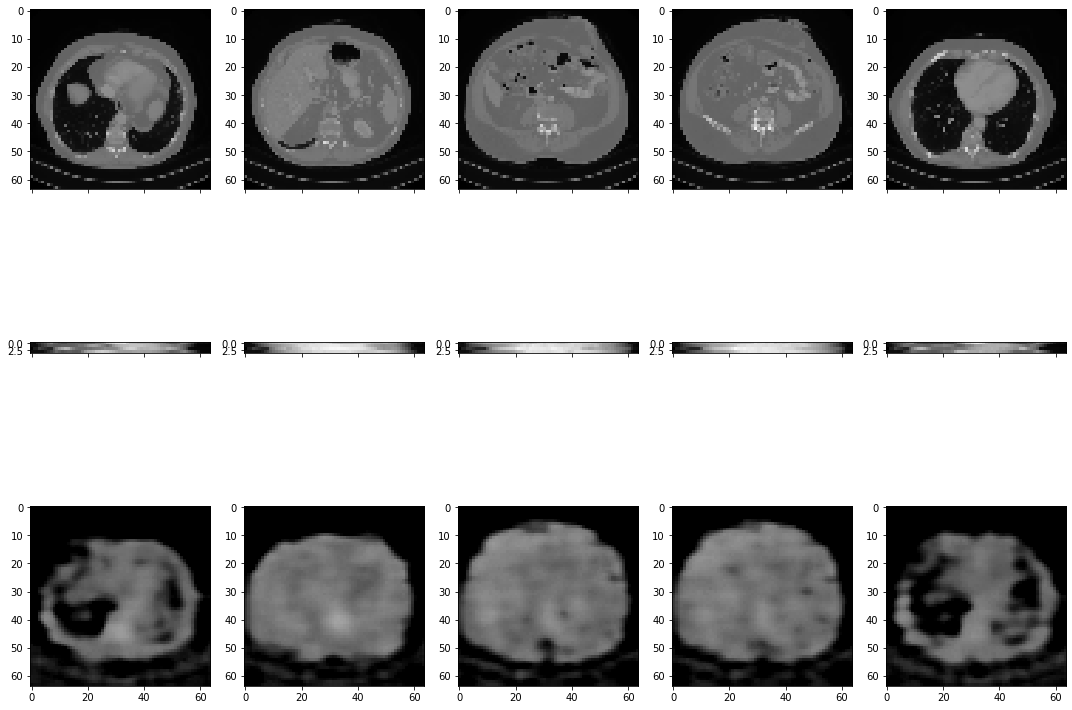

In [5]:
sinoGen.on_epoch_end()   # manual shuffle
sino, imgs = sinoGen.__getitem__(0)
recons = automap_eval.predict(sino)

# visualize reconstruction
def recon_plot(imgs, recons): 
    len_imgs = imgs.shape[0]
    fig, ax = plt.subplots(3, 5, figsize = (15, 12), sharex=True, sharey=False)
    for i in range(5):
#         print(i)
#         print(imgs[i, :, :, 0].shape)
#         print(recons[i, :, :, 0].shape)
        ax[0, i].imshow(imgs[i, :, :, 0], cmap='gray', vmin=0.0, vmax=1.0)
        ax[2, i].imshow(recons[i, :, :, 0], cmap='gray', vmin=0.0, vmax=1.0)
        ax[1, i].imshow(sino[i, :, :, 0].T, cmap='gray', vmin=0.0, vmax=1.0)
    plt.tight_layout()
        
recon_plot(imgs, recons)
    

In [12]:
# check the difference between predictions
def check_diff(data):
    shape = data.shape
    sum = 0
    for i in range(shape[0]):
        sum += np.sum(data[i]-data[0])
    return sum

def check_RMSE(imgs, recons):
    shape = imgs.shape
    print(shape)
    sum = 0
    for i in range(shape[0]):
        sum += np.sqrt(np.sum( (imgs[i]-recons[i])**2) / np.prod(shape[1:]))
    return sum / shape[0]

# print(check_diff(imgs))
# print(check_diff(recons))
print(check_RMSE(imgs, recons))

(400, 64, 64, 1)
0.15534373310569932


In [5]:
from tensorflow.keras.models import Model

# check layer details
layer_names = []
for l in automap_eval.layers:
    layer_names.append(l.name)

print(layer_names)

# truncate automap to get intermediate output
for i in range(len(layer_names)):
    truncated_automap = Model(inputs = automap_eval.input,
                              outputs = automap_eval.get_layer(layer_names[i]).output)
    inter_o = truncated_automap.predict(sino)
    print("After layer: ", layer_names[i], ", diff: ", str(check_diff(inter_o)))
    

['input_1', 'flatten', 'dense', 'dense_1', 'batch_normalization', 'activation', 'dense_2', 'dense_3', 'batch_normalization_1', 'activation_1', 'dense_4', 'dense_5', 'batch_normalization_2', 'activation_2', 'reshape', 'conv2d', 'conv2d_1', 'conv2d_2', 'conv2d_3', 'activation_3']
After layer:  input_1 , diff:  49.89016819000244
After layer:  flatten , diff:  49.89016819000244
After layer:  dense , diff:  -22.502246856689453
After layer:  dense_1 , diff:  306.82656478881836
After layer:  batch_normalization , diff:  72.6497802734375
After layer:  activation , diff:  106.04249572753906
After layer:  dense_2 , diff:  449.9749412536621
After layer:  dense_3 , diff:  1101.086166381836
After layer:  batch_normalization_1 , diff:  24.255833625793457
After layer:  activation_1 , diff:  65.14105606079102
After layer:  dense_4 , diff:  4.227112770080566
After layer:  dense_5 , diff:  -12377.332397460938
After layer:  batch_normalization_2 , diff:  -1345.4870071411133
After layer:  activation_2 , d

## Evaluate using normal image

(400, 400)


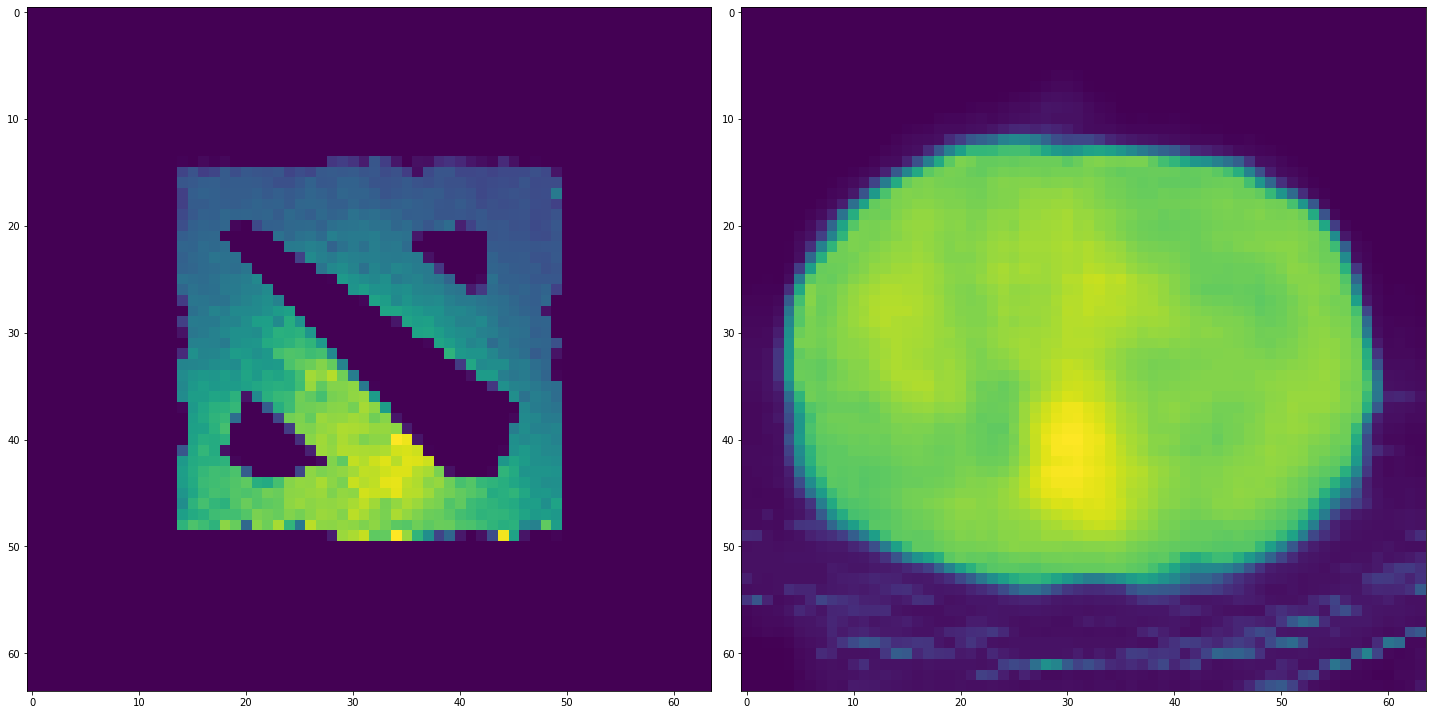

In [9]:
import cv2
from automap import automap_predict

# imread non related image
img = cv2.imread("DOTA2_400x400.png", 0)
img = np.array(img)
img = img / np.amax(img)
print(img.shape)

recon = automap_predict(img, model=automap_eval, size = 64, interval=1)

fig, axs = plt.subplots(1, 2, figsize = (20, 10))
axs[0].imshow(cv2.resize(img, (64, 64)))
axs[1].imshow(recon)

plt.tight_layout()



# Quantitative analysis

In [11]:
def check_RMSE(imgs, recons):
    shape = imgs.shape
    print(shape)
    sum = 0
    for i in range(shape[0]):
        sum += np.sqrt(np.sum( (imgs[i]-recons[i])**2) / np.prod(shape[1:]))
    return sum / shape[0]

# path to exclude 2 model
model_4_dir = ".\\models\\" + "model_230420-13-15" + "\\final.h5"
model_2_dir = ".\\models\\" + "model_230420-13-44" + "\\final.h5"

# path to randomly split
# model_4_dir = ".\\models\\" + "model_210320-07-23" + "\\final.h5"
# model_2_dir = ".\\models\\" + "model_220320-07-04" + "\\final.h5"

In [12]:
import h5py

bs = 2000
img_size = 56
# _, test_ds = pickle.load(open('.\\data\\mnist_ds.p', 'rb'))

# load data from hdf5
ds_h5f = h5py.File('.\\data\\mnist_ds_split_2.hdf5', 'r')
test_ds = ds_h5f["test"]

sinoGen = sinogram_generator(ds=test_ds, bs=bs,
                             interval=1)
sino_180, imgs = next(sinoGen)

# automap_180_eval = create_automap(input_shape=(56, 180, 1),
#                        output_shape=(56, 56, 1), nfilters=64,
#                        FC_activation='relu')
# automap_4_eval = create_automap(input_shape=(56, 4, 1),
#                        output_shape=(56, 56, 1), nfilters=64,
#                        FC_activation='relu')
# automap_2_eval = create_automap(input_shape=(56, 2, 1),
#                        output_shape=(56, 56, 1), nfilters=64,
#                        FC_activation='relu')

# automap_180_eval = create_automap(input_shape=(56, 180, 1), output_shape=(56, 56, 1),
#                                   nfilters=64, trans_n=2000, FC_activation='relu')
automap_4_eval   = create_automap(input_shape=(img_size, 4, 1), output_shape=(img_size, img_size, 1),
                                  nfilters=64, trans_n=0,    FC_activation='relu')
automap_2_eval   = create_automap(input_shape=(img_size, 2, 1), output_shape=(img_size, img_size, 1),
                                  nfilters=64, trans_n=0,    FC_activation='relu')

# automap_180_eval.load_weights(model_180_dir)
automap_4_eval.summary()
automap_4_eval.load_weights(model_4_dir)
automap_2_eval.load_weights(model_2_dir)
print("models loaded")

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 56, 4, 1)]        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 448)               100800    
_________________________________________________________________
batch_normalization_12 (Batc (None, 448)               1792      
_________________________________________________________________
activation_16 (Activation)   (None, 448)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 224)               100576    
_________________________________________________________________
batch_normalization_13 (Batc (None, 224)               896 

In [13]:
sino_4 = sino_180[:, :, [0, 45, 90, 135], :]
sino_2 = sino_180[:, :, [0, 90], :]
# recon_180 = automap_180_eval.predict(sino_180)
recon_4 = automap_4_eval.predict(sino_4)
recon_2 = automap_2_eval.predict(sino_2)

print(check_RMSE(imgs, recon_4))
print(check_RMSE(imgs, recon_2))

(2000, 56, 56, 1)
0.13468863985791524
(2000, 56, 56, 1)
0.2442756708492986
